# Data Projections 

## Data Projection Methods
> - PCA
> - t - SNE

## PCA (Principal Component Analysis)
 - a statistical procedure that converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# dataset
df = pd.read_excel("Occupation by age.xls")
df

,date,geography,geography code,Occupation: All categories: Occupation; Age: All categories: Age 16 to 74; measures: Value,Occupation: All categories: Occupation; Age: Age 16 to 19; measures: Value,Occupation: All categories: Occupation; Age: Age 20 to 24; measures: Value,Occupation: All categories: Occupation; Age: Age 25 to 29; measures: Value,Occupation: All categories: Occupation; Age: Age 30 to 34; measures: Value,Occupation: All categories: Occupation; Age: Age 35 to 39; measures: Value,Occupation: All categories: Occupation; Age: Age 40 to 44; measures: Value,...,Occupation: 9. Elementary occupations; Age: Age 20 to 24; measures: Value,Occupation: 9. Elementary occupations; Age: Age 25 to 29; measures: Value,Occupation: 9. Elementary occupations; Age: Age 30 to 34; measures: Value,Occupation: 9. Elementary occupations; Age: Age 35 to 39; measures: Value,Occupation: 9. Elementary occupations; Age: Age 40 to 44; measures: Value,Occupation: 9. Elementary occupations; Age: Age 45 to 49; measures: Value,Occupation: 9. Elementary occupations; Age: Age 50 to 54; measures: Value,Occupation: 9. Elementary occupations; Age: Age 55 to 59; measures: Value,Occupation: 9. Elementary occupations; Age: Age 60 to 64; measures: Value,Occupation: 9. Elementary occupations; Age: Age 65 to 74; measures: Value
0,2011,Darlington,E06000005,52096,2165,4750,5747,5497,5742,6660,...,724,558,498,518,666,683,620,528,400,136
1,2011,County Durham,E06000047,196872,7448,17376,19485,18772,20667,26112,...,3301,2326,1964,2103,2995,3399,2864,2401,1680,636
2,2011,Hartlepool,E06000001,34197,1319,3142,3386,3169,3527,4456,...,554,387,326,348,466,636,557,453,267,112
3,2011,Middlesbrough,E06000002,62839,2602,6301,7000,6492,6682,7739,...,1121,664,559,671,838,1061,901,768,451,192
4,2011,Northumberland,E06000057,123686,4984,10104,10912,10929,12457,15361,...,1808,1304,1153,1255,1600,1887,1786,1443,1138,461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2011,Caerphilly,W06000018,58647,2251,5270,6107,6049,6539,7817,...,917,726,620,710,872,1070,885,736,521,198
344,2011,Blaenau Gwent,W06000019,22021,883,2032,2180,2087,2361,3128,...,377,317,260,321,464,480,400,325,223,80
345,2011,Torfaen,W06000020,38863,1816,3614,3880,3806,4055,5143,...,505,378,321,387,532,561,488,439,333,118
346,2011,Monmouthshire,W06000021,38064,1646,3113,3016,3106,3599,4810,...,630,383,355,390,528,581,494,439,305,164


In [3]:
# removing unnecessary columns, categorical columns and total column 
df = df.drop(columns = ["date","geography","geography code","Occupation: All categories: Occupation; Age: All categories: Age 16 to 74; measures: Value"])
df.head() # 119 columns 

,Occupation: All categories: Occupation; Age: Age 16 to 19; measures: Value,Occupation: All categories: Occupation; Age: Age 20 to 24; measures: Value,Occupation: All categories: Occupation; Age: Age 25 to 29; measures: Value,Occupation: All categories: Occupation; Age: Age 30 to 34; measures: Value,Occupation: All categories: Occupation; Age: Age 35 to 39; measures: Value,Occupation: All categories: Occupation; Age: Age 40 to 44; measures: Value,Occupation: All categories: Occupation; Age: Age 45 to 49; measures: Value,Occupation: All categories: Occupation; Age: Age 50 to 54; measures: Value,Occupation: All categories: Occupation; Age: Age 55 to 59; measures: Value,Occupation: All categories: Occupation; Age: Age 60 to 64; measures: Value,...,Occupation: 9. Elementary occupations; Age: Age 20 to 24; measures: Value,Occupation: 9. Elementary occupations; Age: Age 25 to 29; measures: Value,Occupation: 9. Elementary occupations; Age: Age 30 to 34; measures: Value,Occupation: 9. Elementary occupations; Age: Age 35 to 39; measures: Value,Occupation: 9. Elementary occupations; Age: Age 40 to 44; measures: Value,Occupation: 9. Elementary occupations; Age: Age 45 to 49; measures: Value,Occupation: 9. Elementary occupations; Age: Age 50 to 54; measures: Value,Occupation: 9. Elementary occupations; Age: Age 55 to 59; measures: Value,Occupation: 9. Elementary occupations; Age: Age 60 to 64; measures: Value,Occupation: 9. Elementary occupations; Age: Age 65 to 74; measures: Value
0,2165,4750,5747,5497,5742,6660,6779,5950,4653,2996,...,724,558,498,518,666,683,620,528,400,136
1,7448,17376,19485,18772,20667,26112,27744,23825,18934,11966,...,3301,2326,1964,2103,2995,3399,2864,2401,1680,636
2,1319,3142,3386,3169,3527,4456,4977,4366,3257,1922,...,554,387,326,348,466,636,557,453,267,112
3,2602,6301,7000,6492,6682,7739,8658,7462,5497,3155,...,1121,664,559,671,838,1061,901,768,451,192
4,4984,10104,10912,10929,12457,15361,17379,15944,12892,8821,...,1808,1304,1153,1255,1600,1887,1786,1443,1138,461


> - There are 119 columns in the data set

In [4]:
# scaling the data
scalar = StandardScaler()
scalar.fit(df)
df_scaled = scalar.transform(df)
df_scaled


array([[-0.34065368, -0.34839411, -0.28756694, ..., -0.32270613,
        -0.33096025, -0.78008274],
       [ 2.58858718,  1.72234356,  1.12722776, ...,  3.64307657,
         3.39881086,  2.06884675],
       [-0.80973143, -0.61211549, -0.53071226, ..., -0.48150683,
        -0.71850678, -0.91683135],
       ...,
       [-0.53416212, -0.53470473, -0.47983814, ..., -0.51114963,
        -0.52619045, -0.8826442 ],
       [-0.62842124, -0.61687166, -0.56881635, ..., -0.51114963,
        -0.6077792 , -0.62054269],
       [-0.03736109,  0.05292817, -0.02372184, ...,  0.17486938,
         0.28678309,  0.14297042]])

In [5]:
# transposing the data
df_t = df_scaled.T
# computing eigen values and eigen vectors
df_cov = np.cov(df_t)
eval,evec = np.linalg.eigh(df_cov)

Sorted eigenvalues [ 9.55927446e+01  1.35566135e+01  3.52066762e+00  1.61621003e+00
  1.07801154e+00  6.03545908e-01  4.31278041e-01  3.95524979e-01
  3.08075807e-01  2.72379897e-01  2.32055686e-01  1.89316766e-01
  1.59196327e-01  1.46134581e-01  1.03708313e-01  9.83726771e-02
  8.49523747e-02  7.78287248e-02  6.53722314e-02  6.12076378e-02
  5.56483649e-02  5.29126037e-02  5.00534253e-02  4.69680342e-02
  3.91049824e-02  3.70814227e-02  3.16441363e-02  3.06490373e-02
  2.82304469e-02  2.42638835e-02  2.26707989e-02  2.14960880e-02
  2.05157999e-02  1.82348538e-02  1.75870225e-02  1.68597820e-02
  1.48182019e-02  1.25696217e-02  1.10319113e-02  1.08104760e-02
  9.92866016e-03  9.47841735e-03  9.16559812e-03  8.24656263e-03
  8.15636484e-03  7.47305258e-03  7.39070059e-03  6.80895565e-03
  6.26600900e-03  5.85696558e-03  5.55995330e-03  5.31201546e-03
  4.96568769e-03  4.88299631e-03  4.51019941e-03  4.38851270e-03
  4.20061221e-03  4.03123215e-03  3.91267551e-03  3.67941420e-03
  3.46

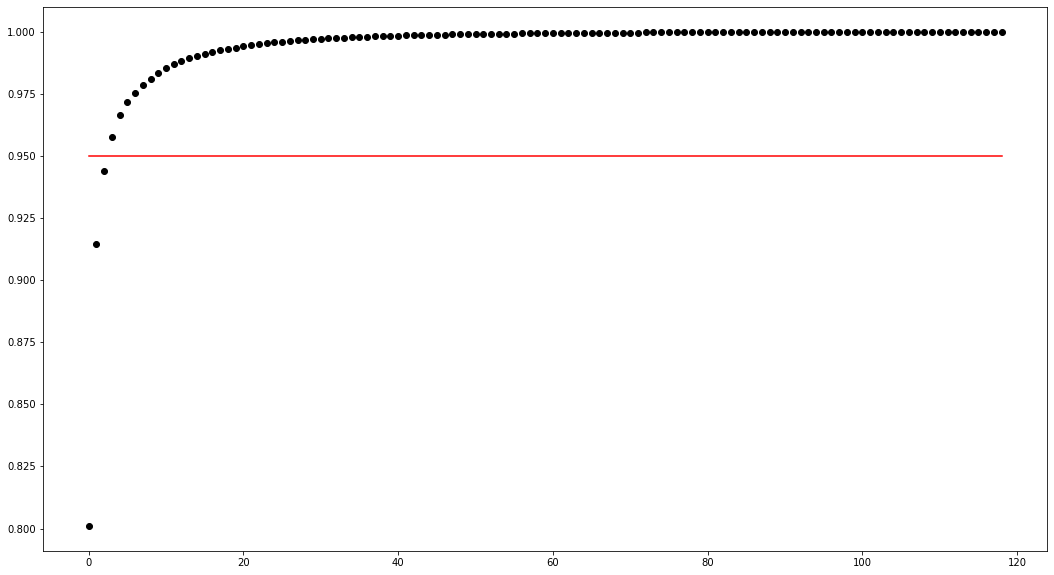

In [6]:
sorted_eval = np.sort(eval)
eval = sorted_eval[::-1]  # reverse the order so that it is decreasing
print("Sorted eigenvalues " + str(eval))

# cumulative sum
cumuleval = np.cumsum(eval)/np.sum(eval)


# cumulative sum of eigenvalues with a threshold at 0.95
plt.figure(figsize=(18,10))
plt.plot(cumuleval, 'ok')
xvals = range(120-1)
plt.plot(xvals, 0.95*np.ones(np.shape(eval)), 'r-')
plt.show()

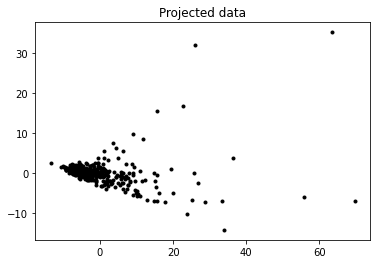

In [7]:
# applying pca
pca = PCA(n_components=4)
pca.fit(df_scaled)
projection = pca.transform(df_scaled)
plt.figure(4)
plt.plot(projection[:,0], projection[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [8]:
projection # we get 4 components but take only the first 2 since we can only plot 2 dimensions

array([[ -4.20115715,   0.474694  ,  -1.22810826,  -1.19590434],
       [ 23.8876167 , -10.17902373,  -2.23777909,   2.3707667 ],
       [ -7.2455222 ,   0.35054871,  -1.74083311,  -0.35234848],
       ...,
       [ -6.33644756,   0.2289006 ,  -1.44549142,  -0.24527007],
       [ -6.22703818,   0.31034342,   0.78580485,   0.08778658],
       [ -0.50525045,  -0.58377461,  -2.09576155,   0.08603   ]])

In [9]:
# saving the data
proj1 = projection[:,0]
proj2 = projection[:,1]
Projection_occupation = pd.DataFrame(proj1,columns=["PCA1"])
Projection_occupation["PCA2"] = proj2
Projection_occupation.to_excel('PCA_occupation.xlsx')

## t-SNE ( t-Distributed Stochastic Neighbor Embedding)
-   a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation.

In [10]:
# applying t-SNE
tsne = TSNE(random_state=42) # t-SNE deafault value for n-components is 2
tsne_results = tsne.fit_transform(df_scaled)

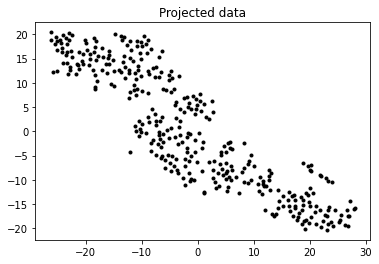

In [11]:
plt.figure(4)
plt.plot(tsne_results[:,0], tsne_results[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [12]:
# Saving the data
t_proj1 = tsne_results[:,0]
t_proj2 = tsne_results[:,1]
Projection_occupation_t = pd.DataFrame(t_proj1,columns=["tsne1"])
Projection_occupation_t["tsne2"] = t_proj2
Projection_occupation_t.to_excel('tsne_occupation.xlsx')

## References
> - [Stack overflow](https://stackoverflow.com)
> - [The Medium](https://medium.com)
> - [Analytics Vidhya](https://www.analyticsvidhya.com)
> - [Towards Data science](https://towardsdatascience.com)
> - Lecture notes and worksheets of Advanced Data Anaytics 